<a href="https://colab.research.google.com/github/joynaomi81/Sentiment-Analysis-Project/blob/main/Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

### **Import** **necessary** **libraries**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Load** **dataset**

In [4]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')

In [5]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Shape** **of** **the** **dataset**

In [7]:
data.shape

(50000, 2)

**Descriptive statistics of the dataset**

In [8]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


**Summarry of the dataset**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


# **Data preprocessing**

**Check Missing Values**

In [10]:
data.isnull().any()

,0
review,False
sentiment,False


In [11]:
data.isnull().sum()

,0
review,0
sentiment,0


In [12]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [13]:
data.shape

(50000, 2)

## **Test** **normalization**

# **Import necessary libraries**

In [14]:
import nltk
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import wordcloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

In [16]:
import spacy
import re, string, unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn. svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn. metrics import classification_report,confusion_matrix,accuracy_score
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:


# Function to clean and normalize text
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Rejoin tokens into a single string
    return ' '.join(tokens)

# Apply preprocessing to the review text
data['cleaned_review'] = data['review'].apply(preprocess_text)

# Check the cleaned data
print(data.head())


<ipython-input-19-34a3eb37db10>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                      cleaned_review  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  


In [20]:
data.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


# **Exploratory Data Analysis**

In [21]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [22]:
data.columns

Index(['review', 'sentiment', 'cleaned_review'], dtype='object')

In [23]:
data.tail()

,review,sentiment,cleaned_review
49995,I thought this movie did a down right good job...,positive,thought movie right good job wasnt creative or...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...
49998,I'm going to have to disagree with the previou...,negative,im going disagree previous comment side maltin...
49999,No one expects the Star Trek movies to be high...,negative,one expects star trek movie high art fan expec...


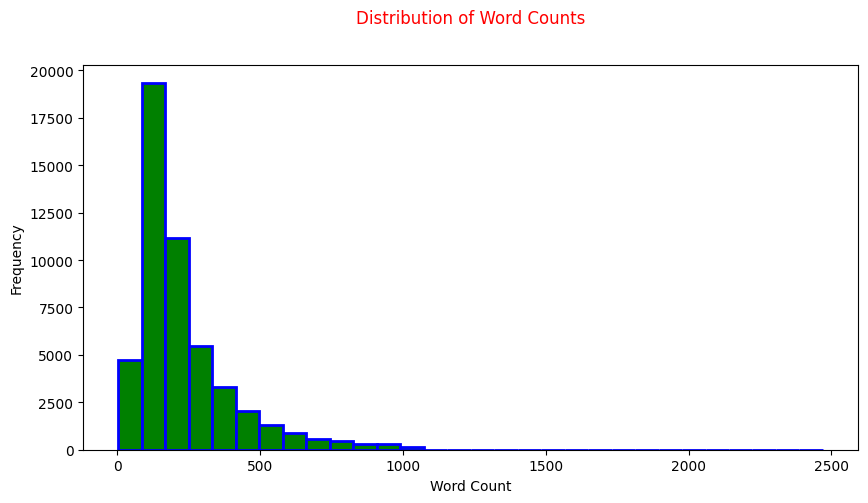

In [24]:
data['word_count'] = data['review'].apply(lambda x: len(x.split()))
data['char_count'] = data['review'].apply(lambda x: len(x))

# Visualizing the distribution of word counts
data['word_count'].hist(bins=30)
data["word_count"].plot(kind = "hist", bins = 30, edgecolor = "blue", linewidth = 2, color = "green", figsize = (10,5))
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Word Counts", color = "red", pad = 30)


plt.show()

Text(0.5, 1.0, 'Distribution of sentiment')

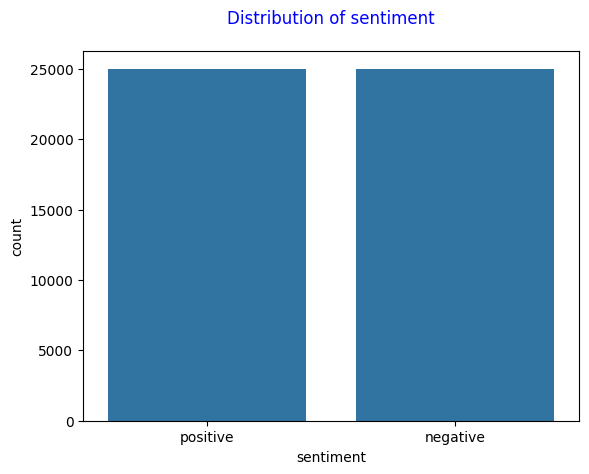

In [25]:
# Plotting the distribution of sentiments
sns.countplot(x='sentiment', data=data)
plt.title("Distribution of sentiment", color = "blue", pad = 20)

## **N**-**Gram** **Analysis**

In [26]:

# Set the chunk size
chunk_size = 10000

# Initialize a list to collect processed bigrams from each chunk
bigram_frequencies = []

# Define the vectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))

def process(chunk):
    # Fit and transform the text data in the chunk
    bigrams = vectorizer.fit_transform(chunk['review'])

    # Convert the sparse matrix to a DataFrame
    bigram_freq = pd.DataFrame(bigrams.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

    # Return the frequency of bigrams
    return bigram_freq

# Process each chunk
for chunk in pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv', chunksize=chunk_size):
    chunk_bigram_freq = process(chunk)
    bigram_frequencies.append(chunk_bigram_freq)

# Combine the bigram frequencies from all chunks
final_bigram_freq = pd.concat(bigram_frequencies).groupby(level=0).sum().sort_values(ascending=False)

# Print the final bigram frequencies
print(final_bigram_freq.head(10))


br br         101088
of the         77259
in the         50252
this movie     31531
the film       26854
and the        26712
the movie      23895
to the         23709
to be          23492
this film      21815
dtype: int64


Text(0.5, 1.0, 'Polarity and Subjectivity Scores')

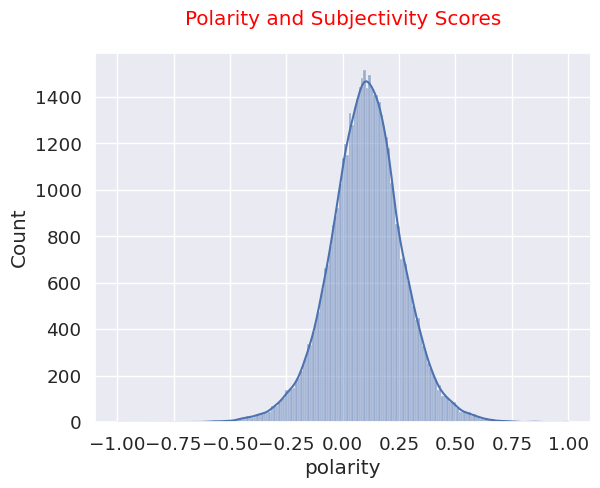

In [146]:
from textblob import TextBlob

# Calculate polarity and subjectivity
data['polarity'] = data['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['subjectivity'] = data['review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Visualize polarity distribution
sns.histplot(data['polarity'], kde=True)
plt.title("Polarity and Subjectivity Scores", color = "red", pad = 20)


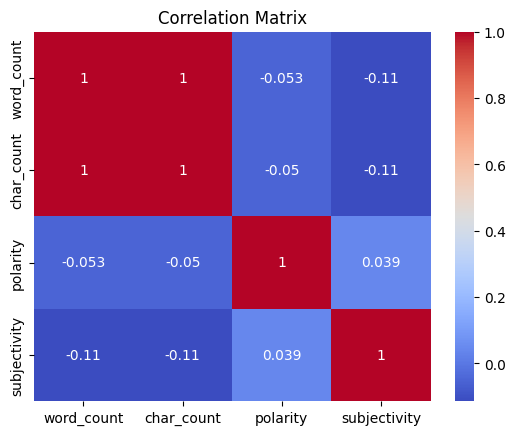

In [28]:
# Plot the correlation matrix
corr_matrix = data[['word_count', 'char_count', 'polarity', 'subjectivity']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [29]:
# Checking class imbalance
print(data['sentiment'].value_counts(normalize=True))




sentiment
positive    0.5
negative    0.5
Name: proportion, dtype: float64


Both positive and negative classes have a proportion of 0.5, which means that 50% of the dataset belongs to the positive class and 50% belongs to the negative class.

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')

# Prepare data
X = data['review']
y = data['sentiment']

# Split data into training and testing sets
train_reviews_data, test_reviews_data, train_labels, test_labels = train_test_split(X, y, test_size=0.25, random_state=42)


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tf = TfidfVectorizer(min_df=1, max_df=2, binary=False, ngram_range=(1, 3))

# Fit and transform the training data
tf_train = tf.fit_transform(train_reviews_data)

# Transform the testing data
tf_test = tf.transform(test_reviews_data)

# Print the shape of the transformed training data
print('TF-IDF Train Shape:', tf_train.shape)
print('TF-IDF Test Shape:', tf_test.shape)


TF-IDF Train Shape: (37500, 6467510)
TF-IDF Test Shape: (12500, 6467510)


In [32]:
#labeling the sentiment data
label=LabelBinarizer()
#transformed sentiment
sentiment_data=label.fit_transform(data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [33]:
train_data=data.sentiment[:30000]

In [34]:
test_data=data.sentiment[30000:]

In [35]:
sentiment_data

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [36]:
train_data=data.sentiment[:30000]

In [37]:
test_data=data.sentiment[30000:]

## Model Training

In [40]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')


In [41]:
# Define features and labels
X = data['review']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [42]:
# Initialize the vectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_transformed = vectorizer.transform(X_test)


In [43]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=1,max_df=2,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train=cv.fit_transform(train_reviews_data)
cv_test=cv.transform(test_reviews_data)

print('BOW_cv_train:',cv_train.shape)
print('BOW_cv_test:',cv_test.shape)


BOW_cv_train: (37500, 6467510)
BOW_cv_test: (12500, 6467510)


# Logistic Regression

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Check the shapes to confirm the transformation is correct
print("Shape of X_train_transformed:", X_train_transformed.shape)
print("Shape of y_train:", y_train.shape)

scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

# Check the shapes again after scaling
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)


logistic = LogisticRegression(max_iter=1000, random_state=42)
logistic.fit(X_train_scaled, y_train)


Shape of X_train_transformed: (37500, 90715)
Shape of y_train: (37500,)
Shape of X_train_scaled: (37500, 90715)
Shape of y_train: (37500,)


LogisticRegression(max_iter=1000, random_state=42)

In [45]:
from sklearn.metrics import accuracy_score

# Ensure the model is trained
logistic = LogisticRegression(max_iter=1000, random_state=42)
logistic.fit(cv_train, y_train)  # Train the model with the training data

# Make predictions on the test data
y_pred_bow = logistic.predict(cv_test)  # Predict using the test data



# **Model** **Evaluation**

In [46]:
accuracy_bow = accuracy_score(y_test, y_pred_bow)
print(f'Accuracy for BoW model: {accuracy_bow:.2f}')


Accuracy for BoW model: 0.81


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
cv = TfidfVectorizer(max_features=5000)
x = cv.fit_transform(data['review']).toarray()
y=  data['sentiment']

In [48]:
x.shape

(50000, 5000)

In [49]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((40000, 5000), (10000, 5000), (40000,), (10000,))

## Naive Bayes Classifier

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [52]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [141]:
prediction = mnb.predict(x_test)

In [142]:
accuracy = accuracy_score(y_test, prediction)
print(f'Accuracy: {accuracy}')

print('\nClassification Report:')
print(classification_report(y_test, prediction))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, prediction))

Accuracy: 0.8517

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Confusion Matrix:
[[4228  733]
 [ 750 4289]]


In [143]:
cm = confusion_matrix(y_test, prediction)


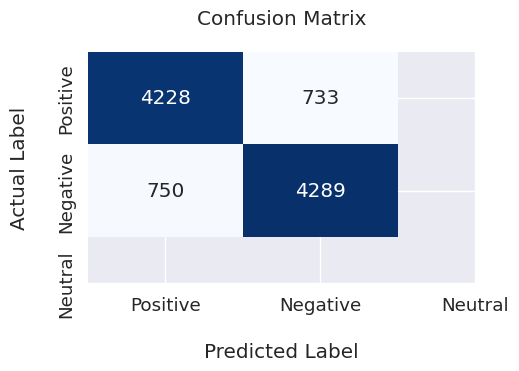

In [144]:

def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(5, 3))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)

    plt.title(title, pad=20)
    plt.xlabel('Predicted Label', labelpad=20)
    plt.ylabel('Actual Label', labelpad=20)
    plt.show()


plot_confusion_matrix(ConfusionMatrix,
                      classes=["Positive", "Negative", "Neutral"],
                      title="Confusion Matrix")


In [58]:
comparison_df = pd.DataFrame(np.c_[y_test, prediction], columns=['Actual', 'Predicted'])

print(comparison_df)

        Actual Predicted
0     positive  negative
1     positive  positive
2     negative  negative
3     positive  positive
4     negative  negative
...        ...       ...
9995  negative  negative
9996  positive  positive
9997  positive  positive
9998  negative  negative
9999  positive  positive

[10000 rows x 2 columns]


In [59]:
import os

# Print current working directory
print("/content/Count-vectorzier.plk:", os.getcwd())

# List files in the current working directory
print("Files in the current working directory:", os.listdir())


/content/Count-vectorzier.plk: /content
Files in the current working directory: ['.config', 'drive', 'sample_data']


In [60]:
import pickle  # Import the pickle module

# Save the CountVectorizer and the model
pickle.dump(cv, open('Count-vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('Movie_Reviews_Sentiment_Analysis.pkl', 'wb'))


In [61]:
def test_model(sentence):
  sentence = save_cv.transform([sentence])
  predicted_sentiment = model.predict(sentence)[0]
  return predicted_sentiment

In [62]:
import pickle

# Load the CountVectorizer and model from pickle files
save_cv = pickle.load(open('Count-vectorizer.pkl', 'rb'))
model = pickle.load(open('Movie_Reviews_Sentiment_Analysis.pkl', 'rb'))


In [63]:
sentence = 'This is the best movie  of my life ever'
predicted_sentiment = test_model(sentence)
print(predicted_sentiment)

positive


In [64]:
sentence = 'This is the worse movie  of my life ever'
predicted_sentiment = test_model(sentence)
print(predicted_sentiment)

negative


In [65]:
sentence = 'I hate the movie '
predicted_sentiment = test_model(sentence)
print(predicted_sentiment)

negative


In [66]:
sentence = "I am going to have to disagree with the previous comment and side with Maltin on this one. This is a second rate, excessively vicious Western that creaks and groans trying to put across its central theme of the Wild West being tamed and kicked aside by the steady march of time. It would like to be in the tradition of 'Butch Cassidy and the Sundance Kid', but lacks that film's poignancy and charm. Andrew McLaglen's direction is limp, and the final 30 minutes or so are a real botch, with some incomprehensible strategy on the part of heroes Charlton Heston and Chris Mitchum. (Someone give me a holler if you can explain to me why they set that hillside on fire.) There was something callous about the whole treatment of the rape scene, and the woman's reaction afterwards certainly did not ring true. Coburn is plenty nasty as the half breed escaped convict out for revenge, but all of his fellow escapees are underdeveloped (they're like bowling pins to be knocked down one by one as the story lurches forward). Michael Parks gives one of his typically shifty, lethargic, mumbling performances, but in this case it was appropriate as his modern style sheriff symbolizes the complacency that technological progress can bring about."
predicted_sentiment = test_model(sentence)
print(predicted_sentiment)

positive


In [67]:
sentence = ' If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom like it'
predicted_sentiment = test_model(sentence)
print(predicted_sentiment)

negative


In [68]:
import nltk
#Download VADER lexicon
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sent_analysis = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [69]:
import pickle
from nltk.sentiment import SentimentIntensityAnalyzer

sent_analysis = SentimentIntensityAnalyzer()

with open('/content/drive/MyDrive/sentiment_analysis.pkl', 'wb') as file:
    pickle.dump(sent_analysis, file)


In [70]:
sentiment_scores = sent_analysis.polarity_scores('Best Movie Ever')

print('Sentiment Analysis Values:')
for key, value in sentiment_scores.items():
    print(f"{key.capitalize()}: {value:.3f}")


Sentiment Analysis Values:
Neg: 0.000
Neu: 0.323
Pos: 0.677
Compound: 0.637
